In [119]:
from fugue_notebook import setup
import pandas as pd
import seaborn as sns
from typing import List, Any, Dict, Tuple, Iterable
import matplotlib.pyplot as plt
# setup()

In [120]:
%%fsql
max_name = SELECT name,gender ,SUM(number) AS total
FROM df
GROUP BY name
ORDER BY total DESC
# TRUNCATE TABLE max_name
YIELD DATAFRAME AS max_name
PRINT




,name:str,gender:str,total:long
8388,Sophia,F,21075
3054,Emma,F,20793
7238,Olivia,F,18256
7153,Noah,M,18120
5884,Liam,M,18002
4068,Jacob,M,17976
6486,Mason,M,17615
3946,Isabella,F,17490
9056,William,M,16495
3185,Ethan,M,16127


In [121]:
%%fsql
SELECT name, total FROM max_name
GROUP BY name
ORDER BY total DESC
PRINT

,name:str,total:long
8388,Sophia,21075
3054,Emma,20793
7238,Olivia,18256
7153,Noah,18120
5884,Liam,18002
4068,Jacob,17976
6486,Mason,17615
3946,Isabella,17490
9056,William,16495
3185,Ethan,16127


In [122]:
%%fsql
SELECT * FROM max_name
LIMIT 10
SAVE OVERWRITE "top_usa_names_2013.csv" (header=true)

In [123]:
def plotterBarChart(df: pd.DataFrame, x_col: str, y_col: str, title: str, x_title: str, y_title: str) -> None:
    plt.figure(figsize=(8,6))
    sns.barplot(data=df, x=x_col, y=y_col)
    plt.ylabel(y_title, fontsize=10)
    plt.xlabel(x_title, fontsize=10)
    plt.title(title, fontsize=14, color='blue')
    plt.show()


,name:str,total:long
8388,Sophia,21075
3054,Emma,20793
7238,Olivia,18256
3946,Isabella,17490
4410,Jayden,15315
1210,Ava,15134
6686,Mia,13066
3050,Emily,13044
5991,Logan,12934
88,Abigail,12313


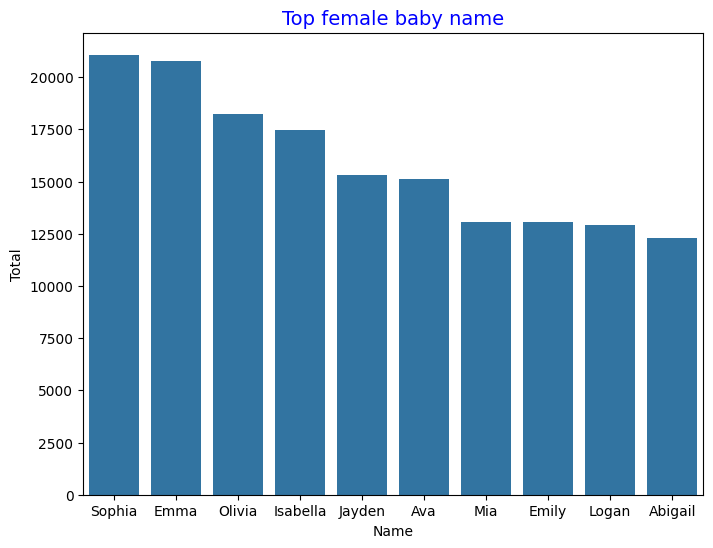

In [124]:
%%fsql
SELECT name, total FROM max_name
WHERE gender == 'F'
ORDER BY total DESC
LIMIT 10
PRINT
OUTPUT USING plotterBarChart(x_col="name", y_col="total", title="Top female baby name", x_title="Name", y_title="Total")


,name:str,total:long
7153,Noah,18120
5884,Liam,18002
4068,Jacob,17976
6486,Mason,17615
9056,William,16495
3185,Ethan,16127
6698,Michael,15366
437,Alexander,14771
2373,Daniel,14150
2914,Elijah,13626


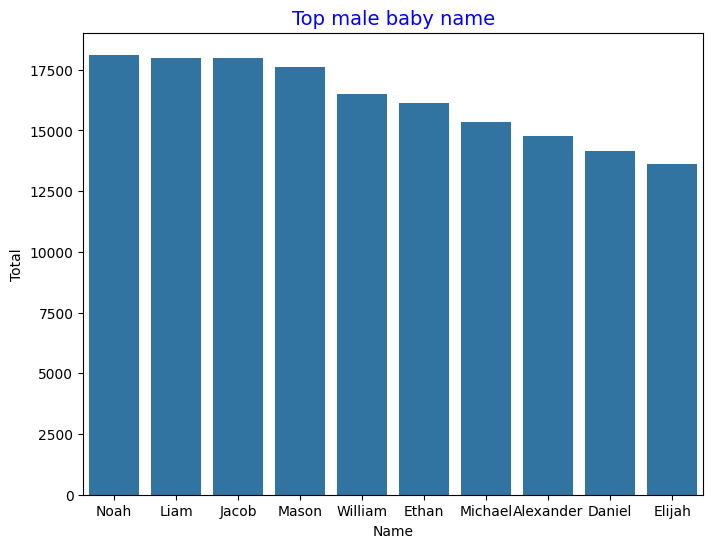

In [125]:
%%fsql
SELECT name, total FROM max_name
WHERE gender == 'M'
ORDER BY total DESC
LIMIT 10
PRINT
OUTPUT USING plotterBarChart(x_col="name", y_col="total", title="Top male baby name", x_title="Name", y_title="Total")
